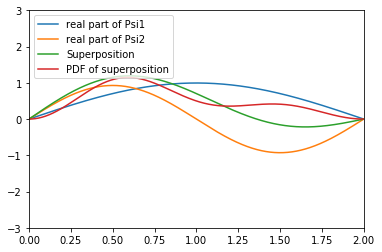

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML
a = 2
fig = plt.figure()
ax = plt.axes(xlim=(0, a), ylim=(-3, 3))

N = 4
lines = [plt.plot([], [])[0] for _ in range(N)]


#This basically creates an empty "line object" that we'll fill with (x,y) values in the animate() function

def init():    
    for line in lines:
        line.set_data([], [])
    return lines


def animate(i):
    x = np.linspace(0, 2, 1000)

    # psi1 is normalized naturally

    psi1 = np.sin((np.pi*x)/2)*np.cos(i/16)

    # psi2 is normalized naturally
    # psi2_real = np.sin(np.pi*x)
    psi2 = np.sin(np.pi*x)*np.cos(i/4)

    # normalization for psi 2
    # psi2 = psi2 / np.linalg.norm(psi2)
    
    # Psi_real = psi1_real + psi2_real
    # normalization for Psi
    Psi = (psi1 + psi2)/np.sqrt(2)
    
    # Psi = Psi / np.linalg.norm(Psi)

    Psi_squared = (np.sin((np.pi*x)/2))**2+(np.sin(np.pi*x))**2+(np.sin((np.pi*x)/2))*(np.sin(np.pi*x))*np.cos((3/16)*i)
    Psi_squared = Psi_squared/2
    # Psi_squared = Psi_squared / np.linalg.norm(Psi_squared)
    
    # change all the arrays into list
    psi1 = psi1.tolist()
    psi2 = psi2.tolist()
    Psi = Psi.tolist()
    Psi_squared = Psi_squared.tolist()

    lines[0].set_data(x, psi1)
    lines[0].set_label('real part of Psi1')
    lines[1].set_data(x, psi2)
    lines[1].set_label('real part of Psi2')
    lines[2].set_data(x, Psi)
    lines[2].set_label('Superposition')
    lines[3].set_data(x, Psi_squared)
    lines[3].set_label('PDF of superposition')

    plt.legend(loc='upper left')

    return lines


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_jshtml())
# plt.show()


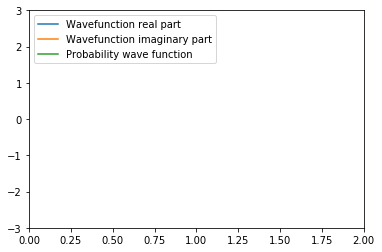

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

# the purpose of the following code is to illustrate the psi under different energy level
m = 9.10938356e-31
# we start with the psi in infintie square well

# input the variables
# you can change the energy level "n" here
n = 1
a = 2
# def infinite_square_well_eigans(n, a, m)
# namely the Eiganstates
# define some constants
hb = 6.62607004e-34/2/np.pi


def psi(x, n, a):

    global hb
    global m
    # wave function
    psi = np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    # energy level
    E = n**2*np.pi**2*hb**2/2/m/a**2

    return psi, E


fig = plt.figure()
ax = plt.axes(xlim=(0, a), ylim=(-3, 3))

# Set the x and y axis ranges
# ax.set_xlim((0, a))
# ax.set_ylim((-3, 3))

N = 3
lines = [plt.plot([], [])[0] for _ in range(N)]


def init():    
    for line in lines:
        line.set_data([], [])
    return lines



def animate(t):
    # assign values and labels to each element of lines list
    
    # input the global variable into local function
    global a
    global n

    # set up the x axis


    x = np.linspace(0, a, 1000)

    time_scale = 5e2
    # psi1 is normalized naturally
    Psi, E = psi(x, n, a)
    # Psi_time = Psi*np.exp(t*E*1j/hb*time_scale)

    # Psi_time now is an time dependet imaginary function

    # now extract and plot the real and imaginary part of Psi
    # Psi_real = Psi*np.cos(E/hb*i)

    Psi_real = Psi*np.cos(t*E/hb*time_scale)
    # Psi_real = np.sin(np.pi*x)*np.cos(i/4)
    Psi_imag = Psi*np.sin(-t*E/hb*time_scale)

    PDF = Psi_real**2 + Psi_imag**2
    
    # convert all the arrays to list
    x = x.tolist()
    Psi_real = Psi_real.tolist()
    Psi_imag = Psi_imag.tolist()
    PDF = PDF.tolist()

    lines[0].set_data(x, Psi_real)
    lines[0].set_label('Wavefunction real part')

    lines[1].set_data(x, Psi_imag)
    lines[1].set_label('Wavefunction imaginary part')
    
    lines[2].set_data(x, PDF)
    lines[2].set_label('Probability wave function')
    
    
    plt.legend(loc='upper left')
    
    return lines

anim = animation.FuncAnimation(fig, animate, init_func=init,
                           frames=100, interval=20)

# E = n**2*np.pi**2*hb**2/2/m/a**2
# print(E/hb)
# (anim.to_jshtml())
# plt.show()
HTML(anim.to_jshtml())
